In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\arush\AppData\Roaming\Python\Python311\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\arush\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\arush\AppData\Roaming\Python\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
y_train.shape


(50000, 1)

In [5]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)


In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

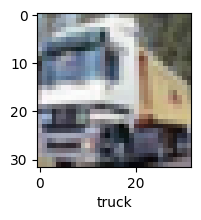

In [10]:
plot_sample(X_train, y_train, 1)


In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 100s 63ms/step - loss: 1.8118 - accuracy: 0.3587
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6236 - accuracy: 0.4255
Epoch 3/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.5419 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4833 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.4327 - accuracy: 0.4956


In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4373 - accuracy: 0.4851
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0997 - accuracy: 0.6148
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9708 - accuracy: 0.6637
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8839 - accuracy: 0.6928
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8145 - accuracy: 0.7163
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7528 - accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7029 - accuracy: 0.7541
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6552 - accuracy: 0.7702
Epoch 9/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6127 - accuracy: 0.7862
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [16]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 11ms/step - loss: 0.9793 - accuracy: 0.6874


[0.9792988300323486, 0.6873999834060669]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 13ms/step


array([[4.99952410e-04, 5.76477149e-04, 3.70323146e-03, 9.71724153e-01,
        4.96023240e-05, 1.52162621e-02, 5.77043975e-03, 2.44613102e-06,
        2.25615571e-03, 2.01246090e-04],
       [1.12211891e-03, 9.69372541e-02, 2.22739732e-06, 1.29449177e-07,
        4.41565089e-06, 8.61695937e-10, 7.52432925e-08, 1.20037813e-09,
        9.01876271e-01, 5.75703743e-05],
       [2.74425466e-02, 7.52101004e-01, 3.48364632e-03, 1.38685817e-03,
        3.31905950e-03, 2.00951778e-04, 1.11479436e-04, 1.06316307e-04,
        1.90551355e-01, 2.12968588e-02],
       [4.61324990e-01, 6.08078502e-02, 3.54210913e-01, 4.53933561e-03,
        4.95880260e-04, 3.43848689e-04, 5.31356130e-03, 1.01561782e-05,
        1.12731874e-01, 2.21557639e-04],
       [1.19138491e-07, 1.38430337e-07, 2.24511279e-03, 2.10664212e-03,
        9.58257020e-01, 8.28219112e-04, 3.65545712e-02, 7.97117355e-06,
        1.95338544e-07, 1.46732813e-08]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

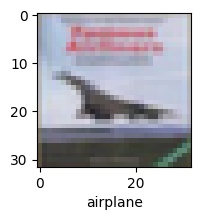

In [20]:
plot_sample(X_test, y_test,3)


In [21]:
classes[y_classes[3]]


'airplane'

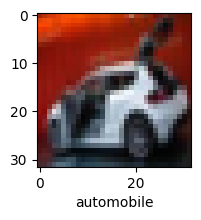

In [22]:
plot_sample(X_test, y_test,6)


In [23]:
classes[y_classes[6]]

'automobile'